### Introduction

### Setup

In [1]:
library(ggplot2)
library(dplyr)
library(ggcorrplot)
library(ggpubr)
library(GGally)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: magrittr

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



Reading file data

In [2]:
ff <- read.csv('forestfires.csv')

### Data Selection

Observations and variables

In [3]:
head(ff)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


List all the variables and data types

In [4]:
str(ff)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


### Key Variable Analysis

Get center variability, center and outliers

In [5]:
summary(ff)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

Inspect area values

Warning message:
"Removed 247 rows containing non-finite values (stat_bin)."Warning message:
"Removed 247 rows containing non-finite values (stat_density)."

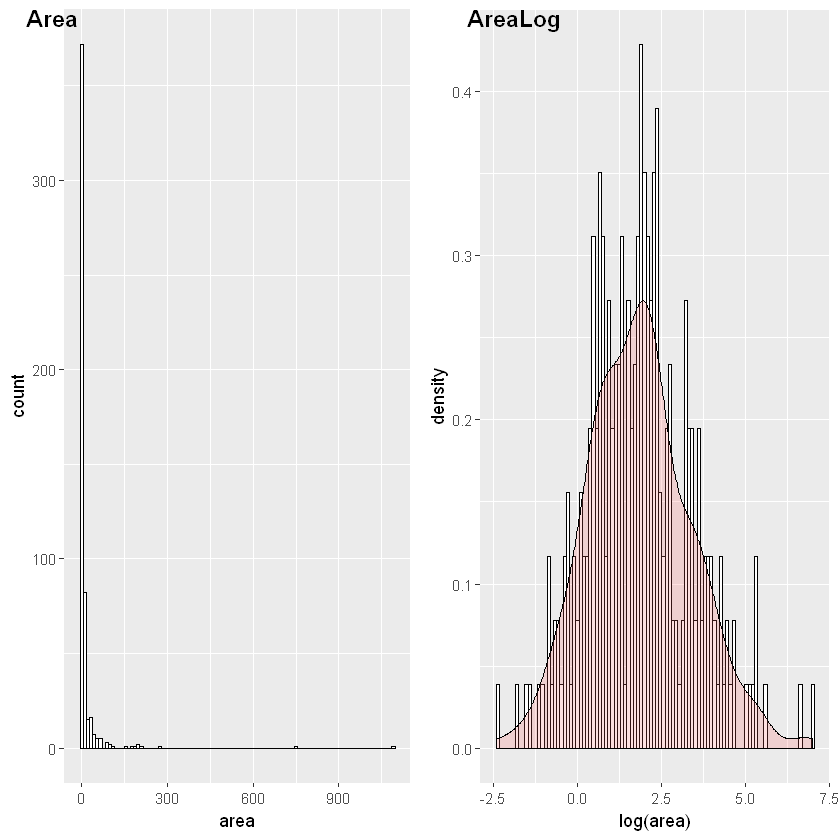

In [6]:
ar <- ggplot(ff, aes(x=area)) + 
  geom_histogram(color="black", fill="white", bins = 100)

#Log transformation
arlog <- ggplot(ff, aes(x=log(area))) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 100)+
 geom_density(alpha=.2, fill="#FF6666") 

ggarrange(ar, arlog, 
          labels = c("Area", "AreaLog"),
          ncol = 2, nrow = 1)

Assume damaging forest fires have areas larger than 10

In [7]:
bff <- ff %>%
    filter(area > 10) %>%
    arrange(desc(area))

nrow(bff)
head(bff)

[1] 95

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0,1090.84
8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0,746.28
7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0,278.53
1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0,212.88
2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0,200.94
8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0,196.48


In [8]:
#Get all the numeric columns
numbff = Filter(is.numeric, bff)

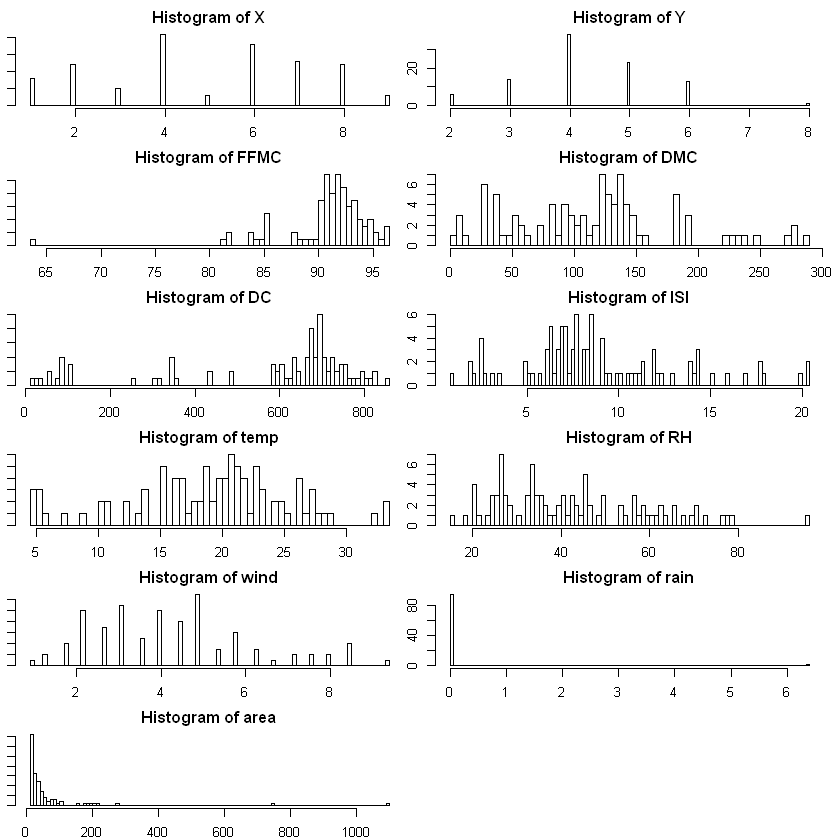

In [9]:
layout(matrix(1:12,6,2,byrow=TRUE))
par(mar=c(2,1,2,1))

for (col in 1:ncol(numbff)) {
    hist(numbff[,col], breaks=100, main = paste("Histogram of",colnames(numbff)[col]) )
}

### Key Relationship Analysis

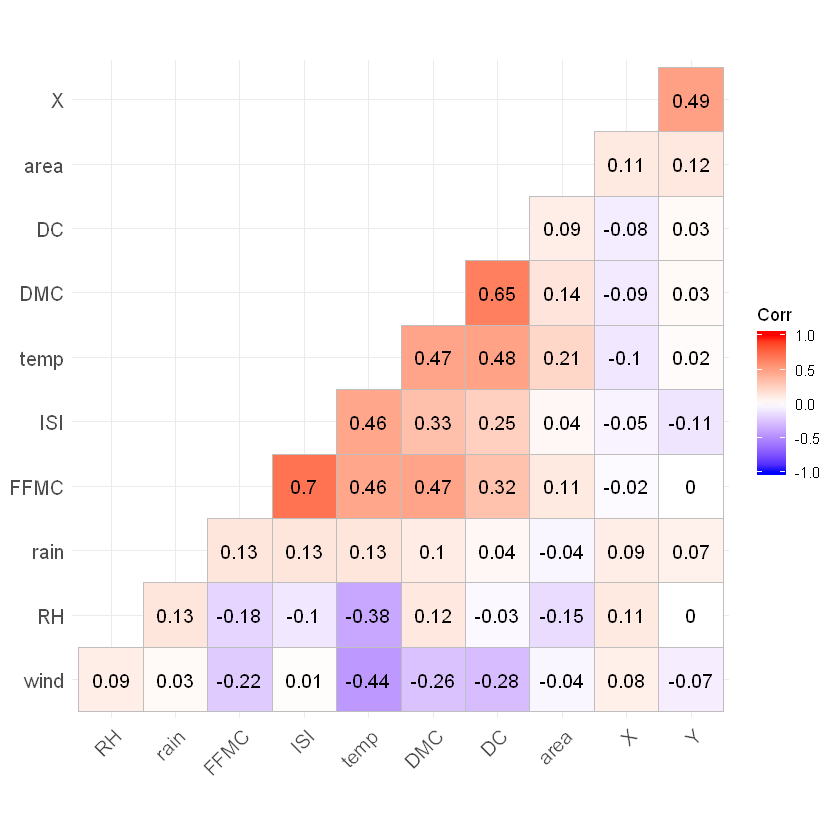

In [10]:
#Correlation matrix
cormat <- round(cor(numbff),2)
ggcorrplot(cormat, hc.order = TRUE, type = "lower", lab = TRUE)

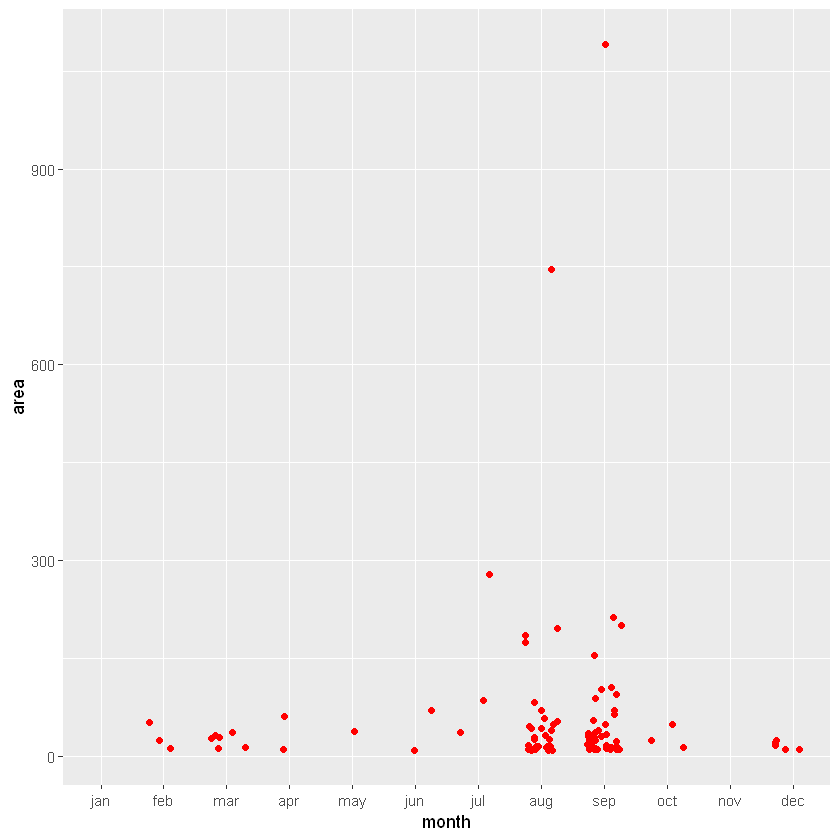

In [11]:
#Area by month
ggplot()+
geom_jitter(aes(month, area), data = bff, colour = I("red"), position = position_jitter(width = 0.3)) +
 scale_x_discrete(limits=c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"))

In [12]:
bffM <- bff %>%
    filter(month == 'jul' | month == 'aug' | month == 'sep' | month == 'oct') %>%
    arrange(desc(area))

nrow(bffM)
head(bffM)

[1] 75

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0,1090.84
8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0,746.28
7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0,278.53
1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0,212.88
2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0,200.94
8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0,196.48


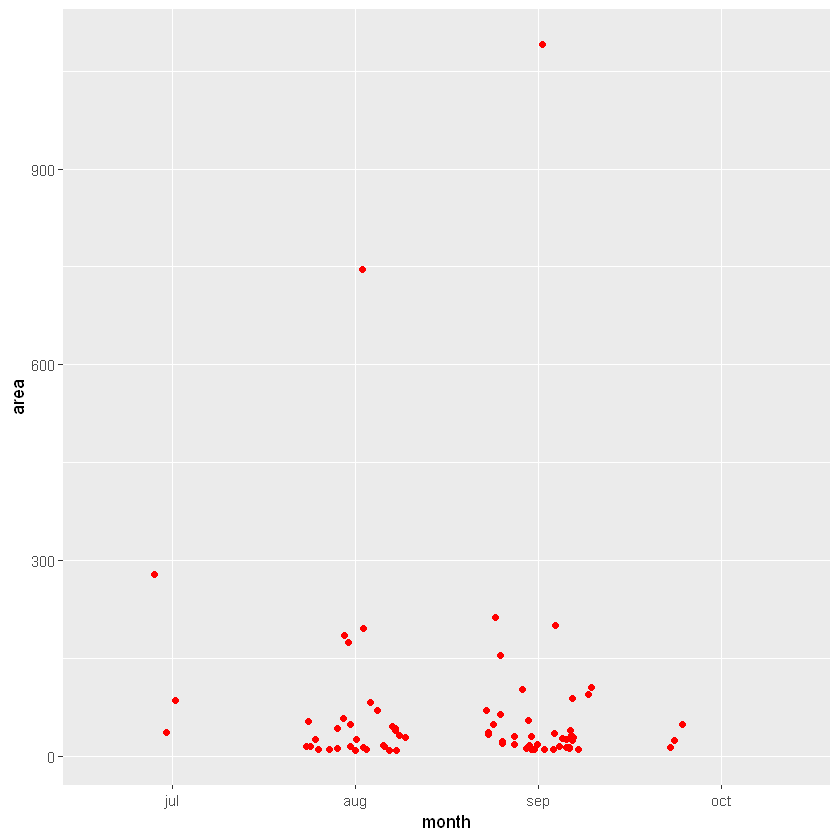

In [13]:
#Area by month
ggplot()+
geom_jitter(aes(month, area), data = bffM, colour = I("red"), position = position_jitter(width = 0.3)) +
 scale_x_discrete(limits=c("jul", "aug", "sep", "oct"))

In [14]:
bffM %>%
    group_by(month, day) %>%
    summarize(count = length(area), mean(area), maxar = max(area),
    median(area), sum(area)) %>%
    arrange(desc(maxar))

month,day,count,mean(area),maxar,median(area),sum(area)
sep,sat,7,217.93000,1090.84,39.350,1525.51
aug,thu,4,203.95500,746.28,29.600,815.82
jul,mon,1,278.53000,278.53,278.530,278.53
sep,tue,7,68.84714,212.88,20.030,481.93
aug,sun,8,45.23750,196.48,21.215,361.90
aug,wed,3,106.03333,185.76,82.750,318.10
aug,sat,6,59.64333,174.63,42.150,357.86
sep,sun,8,44.75125,95.18,39.015,358.01
sep,wed,3,52.64000,88.49,37.710,157.92
jul,tue,1,86.45000,86.45,86.450,86.45


Warning message:
"Removed 1125 rows containing non-finite values (stat_smooth)."

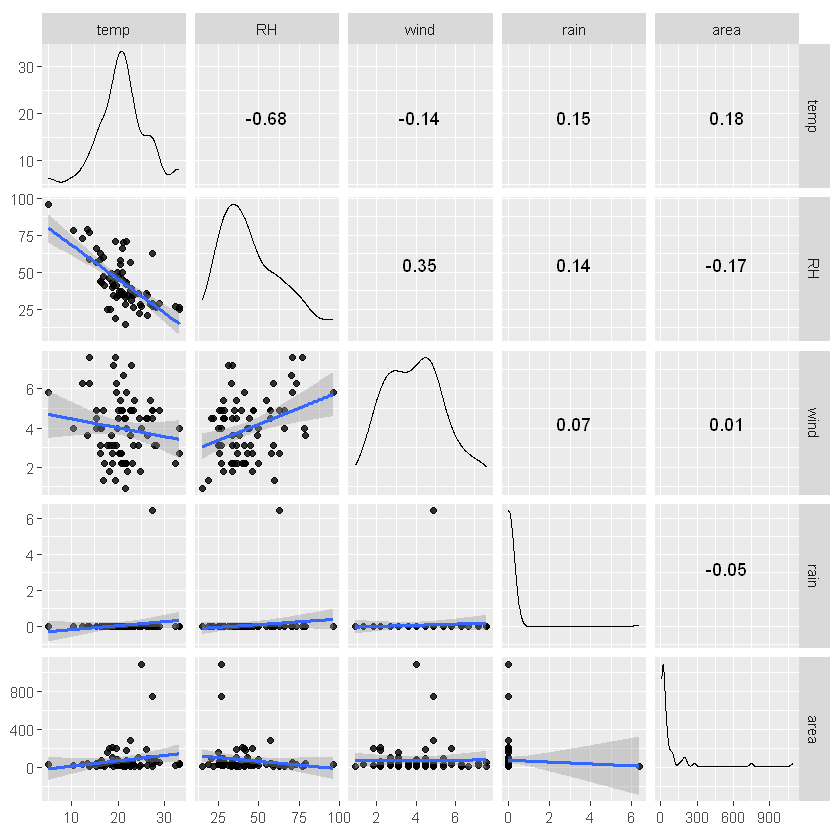

In [15]:

#ggpairs(bffM) 
#Get all the numeric columns
numbffM = Filter(is.numeric, bffM)

ggscatmat(numbffM, columns = 7:11, alpha=0.8) +
geom_smooth(method="lm")

### Secondary Effects

In [16]:
ffXYgroup = bffM %>%
    group_by(X, Y) %>%
    summarize(logMeanArea = log(mean(area)), meanArea = mean(area), 
              medianArea = median(area), count = n(), totalArea = sum(area))

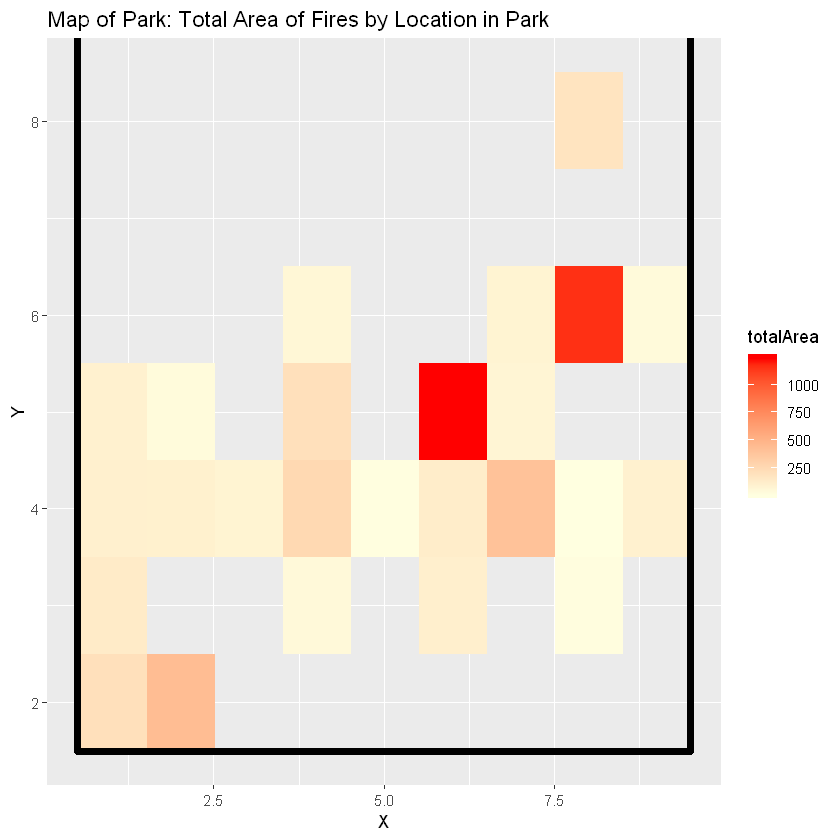

In [17]:
ggplot(ffXYgroup, aes(x=X, y=Y, fill=totalArea)) +
  geom_raster() + 
  scale_fill_gradient(low= "light yellow", high="Red") + 
  geom_rect(xmin=0.5, xmax=9.5, ymin=1.5, ymax=9.5, color="black", fill=NA, size=2) +
  ggtitle("Map of Park: Total Area of Fires by Location in Park")

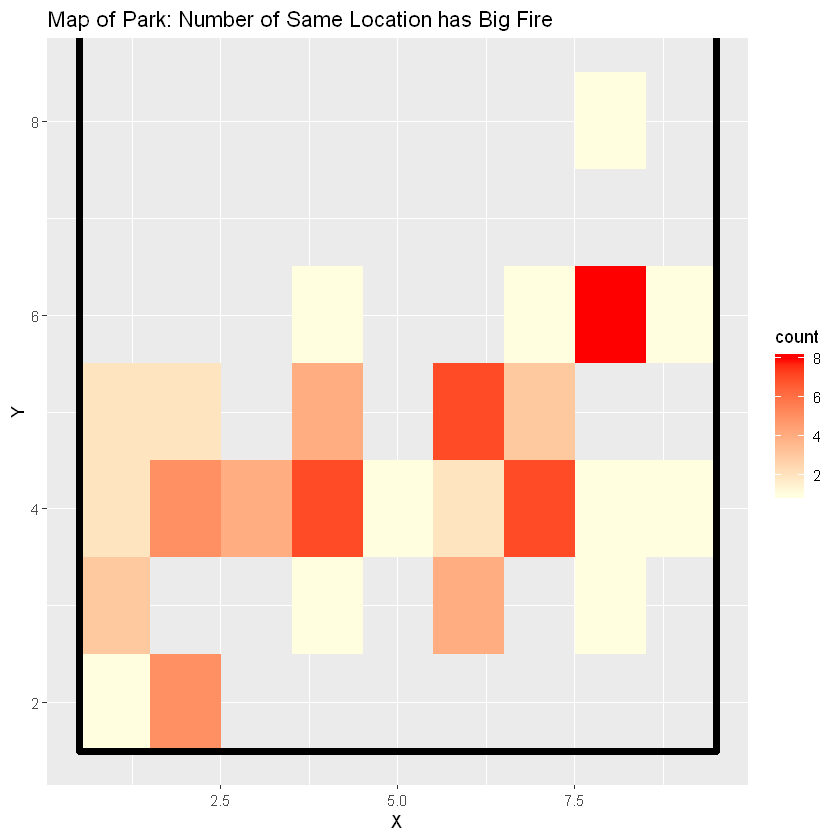

In [18]:
ggplot(ffXYgroup, aes(x=X, y=Y, fill=count)) +
  geom_raster() + 
  scale_fill_gradient(low= "light yellow", high="Red") + 
  geom_rect(xmin=0.5, xmax=9.5, ymin=1.5, ymax=9.5, color="black", fill=NA, size=2) +
  ggtitle("Map of Park: Number of Same Location has Big Fire")

### Conclusion